In [4]:
import numpy as np
import math
import matplotlib
import matplotlib.pyplot as plt

<font color='blue'> **Q. As written there are three dimensionful parameters, J, h, and β = 1/T . Find a set of TWO dimensionless parameters and rewrite the exact result (4) in terms of those variables.**</font>

.....

<font color='blue'> **Q. The expected net magnetization M (which is already dimensionless) is given by $⟨M⟩ =\frac{\partial}{\partial h} log Z[β, J, h] $ Derive an expression for ⟨M⟩ in terms of your 2 chosen dimensionless variables by actually differentiating Z (4). You don’t have to get it to as simple a form as possible, but make sure it’s simple enough to easily program as a function of your 2 dimensionless variables.**</font>

\begin{align}
⟨M⟩&=T\frac{\partial}{\partial h}  logZ[β,J,h]\\
&=\frac{1}{\beta}\frac{\partial}{\partial h}  logZ[β,J,h]\\
&=\frac{1}{\beta}\frac{1}{Z[β,J,h]}\frac{\partial Z[β,J,h]}{\partial h}\\
\frac{∂Z[β,J,h]}{∂h} &=N\left(λ_+^{N−1}\frac{∂λ_+}{∂h} +λ_-^{N−1}\frac{∂λ_-}{∂h} \right)\\
​\frac{∂λ_\pm}{∂h}&=e^{\beta J}\left(sinh\left(\frac{h}{T}\right)\cdot \frac{1}{T}\pm \frac{sinh(h/T)cosh(h/T)}{\sqrt{sinh^2(h/T)+e^{-4\beta J}}}\cdot \frac{1}{T}\right)\\
&=e^{\beta J}\left(sinh\left(h\beta\right)\cdot\beta\pm \frac{sinh(h\beta)cosh(h\beta)}{\sqrt{sinh^2(h\beta)+e^{-4\beta J}}}\cdot \beta\right)\\
⟨M⟩&=\frac{1}{\beta}\cdot \frac{N\left(λ_+^{N−1} \frac{∂λ_+}{∂h} +λ_-^{N−1}\frac{∂λ_-}{∂h} \right)}{λ_+^N+λ_-^N}
 
​

\end{align}

<font color='blue'>**Q. On a single figure plot ⟨m = M/N⟩ (using the expression you just found) for J = 0.75, β = 1 for h ∈ [−1, +1] for N ∈ {1, 2, 4, 8, 16,∞} using what you found for ⟨M⟩ in the previous part and the exact m (6).**</font>

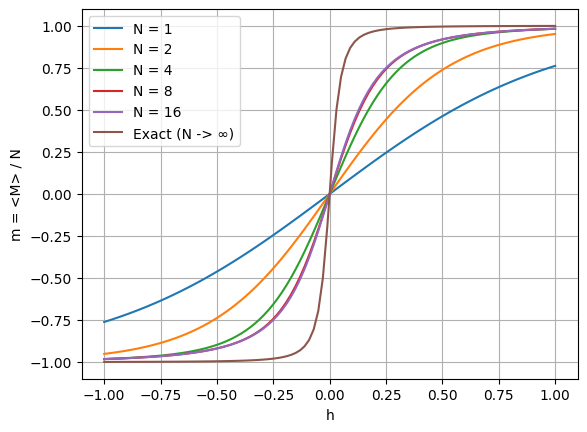

In [16]:
def exact_m(h, T, J):
    return np.sinh(h/T)/np.sqrt((np.sinh(h/T))**2+np.exp(-4*J/T))

def lambda_pm(h, J, T,pm):
    if(pm=='+'):
        return np.exp(J / T) * (np.cosh(h / T) + np.sqrt(np.sinh(h / T)**2 + np.exp(-4 * J / T)))
    else:
        return np.exp(J / T) * (np.cosh(h / T) -np.sqrt(np.sinh(h / T)**2 + np.exp(-4 * J / T)))
def del_lambda_pm(h,J,T,pm):
    sinhTerm=np.sinh(h/T)
    coshTerm=np.cosh(h/T)
    if(pm=='+'):
        return np.exp(J/T)*(sinhTerm/T+(1/T*sinhTerm*coshTerm/np.sqrt(sinhTerm**2+np.exp(-4*J/T))))
    else:
        return np.exp(J/T)*(sinhTerm/T-(1/T*sinhTerm*coshTerm/np.sqrt(sinhTerm**2+np.exp(-4*J/T))))


def magnetization_per_spin_finite_N(h, J, T, N):
    numerator=N*(lambda_pm(h,J,T,'+')**(N-1)*del_lambda_pm(h,J,T,'+')+lambda_pm(h,J,T,'-')**(N-1)*del_lambda_pm(h,J,T,'-'))
    denominator=lambda_pm(h,J,T,'+')**N+lambda_pm(h,J,T,'-')**N
    return T * (numerator / denominator)


J=0.75
beta=1
T=1/beta
N_values=[1,2,4,8,16,math.inf]

h_values=np.linspace(-1,1,100)
fig, ax = plt.subplots()

# ax.plot(h_values, exact_m(h_values,T,J), label=f'exact')
for N in N_values:
    magnetizations = [magnetization_per_spin_finite_N(h, J, T, N) / N if N != np.inf else exact_m(h, J, T)
                      for h in h_values]
    label = f"N = {N}" if N != np.inf else "Exact (N -> ∞)"
    plt.plot(h_values, magnetizations, label=label)
plt.xlabel("h")
plt.ylabel("m = <M> / N")
ax.legend()
plt.grid(True)